In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [6]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

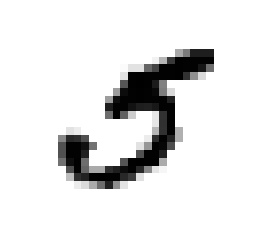

In [13]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
y[36000]

5.0

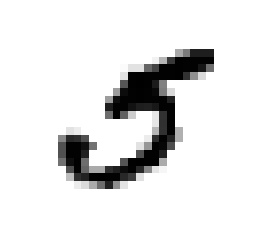

In [25]:
#for i in range (100, 68000, 8000):
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [18]:
for i in range (100, 68000, 8000):
    print(y[i])

0.0
1.0
2.0
3.0
5.0
6.0
7.0
9.0
3.0


In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [20]:
import numpy as np
shuffle_index = np.random.permutation(60000)
shuffle_index
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [21]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [26]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495


0.95725
0.96215
0.9643


In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.95725,  0.96215,  0.9643 ])

In [29]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.90805,  0.9107 ,  0.9102 ])

In [30]:
# confustion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53899,   680],
       [ 1646,  3775]])

In [35]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.84736251402918072

In [36]:
recall_score(y_train_5, y_train_pred)

0.69636598413576833

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76447954637505067

In [39]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 122804.6917372])

In [44]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [57]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method="decision_function")
y_scores

array([ -511511.52908148,  -760793.31655305,  -162114.91516798, ...,
        -934758.82782804,  -346560.82684297, -1179234.22322802])

In [58]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

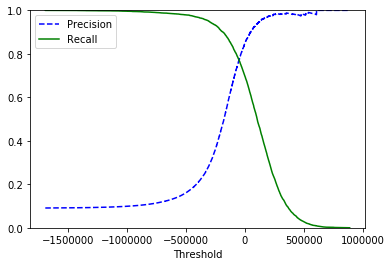

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)    
plt.show()

In [60]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [61]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-160153.57441242, -438565.5186869 , -418167.12431431,
          50874.70918305, -284392.73336754,  122804.6917372 ,
        -689461.69051952, -293349.89208015, -675879.83496426,
        -821539.56764778]])

In [62]:
np.argmax(some_digit_scores)

5

In [63]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [64]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [65]:
len(ovo_clf.estimators_)

45

In [70]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.87237552,  0.86364318,  0.86517978])

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9085183 ,  0.91164558,  0.90943642])

In [73]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5738,    4,   19,   10,    9,   48,   47,    8,   36,    4],
       [   2, 6476,   51,   29,    6,   42,    6,    8,  111,   11],
       [  55,   40, 5303,  106,   82,   29,   97,   62,  169,   15],
       [  53,   41,  131, 5343,    4,  244,   34,   46,  133,  102],
       [  24,   25,   35,   10, 5380,   11,   56,   29,   78,  194],
       [  68,   42,   31,  182,   70, 4632,  112,   25,  161,   98],
       [  33,   23,   44,    2,   41,   97, 5635,    4,   39,    0],
       [  22,   29,   68,   32,   55,   12,    6, 5777,   14,  250],
       [  51,  160,   71,  155,   12,  168,   54,   26, 5007,  147],
       [  43,   34,   25,   88,  169,   44,    3,  166,   76, 5301]])

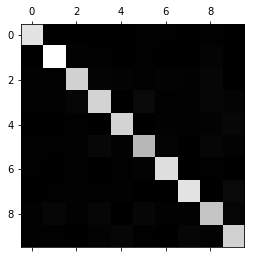

In [74]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

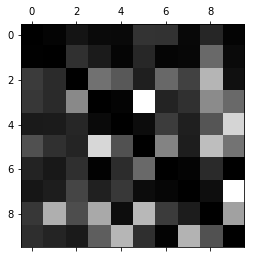

In [75]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()